# Aqui vamos a analizar el preprocesado de los datos

#### Comenzaremos presentando una serie de funciones auxiliares

* `word`: toma un string y realiza un procesamiento de ese string realizando separaciones

* `date`: toma la fecha y devuelve e un diccionario el instante de observación junto con los satélites activos en ese momento.

* `all_information2`: le das el nombre de un archivo rinex que se encuentre en la misma carpeta donde se encuentre el script y te devuelve el diccionario comentado en el capítulo 2 del trabajo de fin de grado. IMPORTANTE: cambiar la extensión del archivo rinex por .txt

__Observacion__ : hemos añadido los tipos de los inputs y outputs de estas funciones de python con el fin de que su entendimiento sea más sencillo, aunque esto sea necesario en python


In [2]:
def words(s: str) -> list:  
    lista = []
    aux = ""
    indicador = 0
    for i in range(len(s)):
        if s[i] =="\n":
            lista.append(aux)
        
        elif (s[i] != " "):
            aux += s[i]
            indicador = 0
        else:
            if (aux != "" or indicador>17): #Es un caso especial que sucede en los archivos de lectura
                lista.append(aux)
                indicador = 0
            aux = ""
            indicador += 1
            
    return lista 

def date(a : str) -> dict: #Coloca la fecha e instante de observación junto con los satélites activos en ese momento
    D = {}
    aux = ""
    for i in range(len(a)):
        try:
            if(a[i] != int(a[i]) ):
                aux += a[i]

        except ValueError:
            D[aux] = []
            break

    aux = ""

    i =2
    while (i<len(a)):
        try:
            if(a[i] != int(a[i]) ):
                aux += a[i]
                i+=1
        except ValueError:
            if(len(aux))<1:
                aux+= a[i]
            if(len(aux)>1):
                D[aux] = []
                aux = ""
            else:
                i+=1
                aux += a[i]
                i+=1
    
    D[aux] = []
    return D



def all_information2(filename : str) -> dict:
    f  = open(filename, 'r')
    lines = f.readlines()
    inicio = lines.index('                                                            END OF HEADER\n')
    lines = lines[inicio+1:] # El inicio contiene información que no es necesaria
    lista = []
    indice_lista = 0

    for i in range(len(lines)):
        
        if (len((lines[i]))<20 and len(words(lines[i-1])) == 8):
            lista.append(words(lines[i]))
            
        elif (len(words(lines[i]))) == 2 and('G' in words(lines[i])[len(words(lines[i]))-1] ):
            lista[len(lista)-1][7]+=(words(lines[i])[1])
        
        elif (len(lines[i]) <20 and len(lines[i-1])>40) or lines[i]=='\n' :
            pass
           
        else:
            lista.append(words(lines[i]))
            
            indice_lista +=1
    
    k = 1
    SD = {}
    r = 0
    for i in (lista):  
         if(len(i)==8 ):

            D = date(i[len(i)-1])
            for j in (list(D.keys())):
                
                D[j] = lista[r]
                
                r+=1
            
            SD[str(k)] = D
            k+=1
    return (SD)


Vamos a mostrar un ejemplo de la función principal

In [3]:
filename = "ejemplo.txt"
D = all_information2(filename)

print("\nLa información asociada a la i-ésima observación es D[i], veamos el caso para i = 25\n\n", D['25'])
print("\nLa información total del archivo es:\n\n","Escribir D (no lo haremos aquí con el fin de ahorrar espacio")


La información asociada a la i-ésima observación es D[i], veamos el caso para i = 25

 {'10': ['23', '2', '16', '0', '12', '0.0000000', '0', '10G01G03G04G06G09G14G17G19G21G31'], 'G01': ['21246880.460', '21246882.880', '21246881.960', '111653538.4520', '87002919.3340'], 'G03': ['20554583.740', '20554585.200', '20554585.680', '108015407.0930', '84168050.2870'], 'G04': ['21075999.080', '21075999.600', '21076002.740', '110755464.1310', '86303134.6250'], 'G06': ['23946498.740', '23946501.880', '23946502.320', '125839699.1260', '98056919.8100'], 'G09': ['23102566.020', '23102569.340', '23102569.140', '121405106.0650', '94601492.8660'], 'G14': ['25499072.580', '25499079.720', '25499089.980', '133998527.0871', '104414465.0111'], 'G17': ['21124123.200', '21124122.040', '', '111008051.1970', '86499798.3310'], 'G19': ['22062299.120', '22062296.800', '', '115938166.0940', '90341417.0140'], 'G21': ['23126406.220', '23126405.460', '', '121530782.1850', '94699212.9040'], 'G31': ['24484959.640', '244

#### Ahora vamos a mostrar funciones más específicas para un archivo de tipo RINEX 2.11
* `unafrecuencia` toma el nombre del archivo rinex, un número de 0 a 5 donde y un satélite:
    - 0 -> C1
    - 1 -> P2
    - 2 -> P5
    - 3 -> L1
    - 4 -> L2
    - 5 -> L5
    la función devuelve toda la información sobre ese satélite contenida en el archivo
        
    
* `C1`, `P2`, `L1`, `L2` son una simplificación de `unafrecuencia` y que utilizaremos para facilitar el entendimiento a la hora de crear algoritmos

In [8]:
def unafrecuencia(filename : str , numero : int,sat : str) -> dict: # Me devuelve la información acerca de una frecuencia
    datos = all_information2(filename)
    frec  = {} 
    for i in range(1,3601,1) :
        if str(i) in datos.keys() and sat in datos[str(i)] and len(datos[str(i)][sat])>4:
           
            frec[int(str(i))] = float(datos[str(i)][sat][numero])
            
    return frec

def C1(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,0,sat)

def P2(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,1,sat)

def L1(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,3,sat)

def L2(filename : str ,sat : str ) -> dict:
    return unafrecuencia(filename,4,sat) 

#La clave hace referencia al número de observación y el contenido a la información del satélite en ese instante
print("Ejemplo datos C1 contenidos en ejemplo.txt sobre el satélite G01\n\n",C1(filename,'G01'))

Ejemplo datos C1 contenidos en ejemplo.txt sobre el satélite G01

 {1: 20989370.42, 2: 20999379.52, 3: 21009451.78, 4: 21019586.9, 5: 21029784.98, 6: 21040045.6, 7: 21050369.78, 8: 21060756.0, 9: 21071205.48, 10: 21081717.12, 11: 21092291.48, 12: 21102928.8, 13: 21113628.68, 14: 21124390.6, 15: 21135215.36, 16: 21146102.38, 17: 21157051.72, 18: 21168062.94, 19: 21179136.94, 20: 21190272.48, 21: 21201470.02, 22: 21212730.18, 23: 21224051.7, 24: 21235435.22, 25: 21246880.46, 26: 21258388.62, 27: 21269956.24, 28: 21281586.6, 29: 21293278.58, 30: 21305031.54, 31: 21316845.86, 32: 21328721.62, 33: 21340658.62, 34: 21352656.58, 35: 21364715.82, 36: 21376835.66, 37: 21389016.72, 38: 21401258.48, 39: 21413560.6, 40: 21425922.88, 139: 22928433.76, 140: 22946148.5, 141: 22963909.84, 142: 22981715.68, 143: 22999564.26, 144: 23017456.98, 145: 23035392.7, 146: 23053371.5, 147: 23071393.16, 148: 23089457.46, 149: 23107565.54, 150: 23125713.62, 151: 23143904.06, 152: 23162136.04, 153: 23180409.08, 15

**Para restar observables de fase y/o código utilizamos la siguiente función**

In [6]:
def f1menosf2(f1 : dict ,f2: dict) -> dict:
    
    F ={}
    
    N = max(list(f1.keys())[len(f1)-1] , list(f2.keys())[len(f2)-1])    
    
    for i in range(N+1):
        if i in f1.keys() and i in f2.keys():
            F[i] = f1[i] - f2[i]
    return F


Vamos a mostrar las siguientes funciones básicas que terminan con la parte numérica de la fase del preprocesado de datos:
* brecha: que devuelve la cantidad de saltos de ciclo provocados por una brecha de datos.
* satelites: que devuelve todos los satélites que se utilizan en una observación.

In [22]:
def brecha(tiempos : int) -> list:
    saltos_ciclo = []
    
    indicador = tiempos[0]
    for i in tiempos[1:]:
        if i - indicador > 60:
            print("SALTO DE CICLO ENTRE", indicador, i)
            saltos_ciclo.append((indicador,i))
        indicador = i
        
    return saltos_ciclo



def satelites(filename : str ) -> list:

    datos = all_information2(filename)
    cjto = set()
    lista = []
    for i in (datos.keys()):

        cjto.update(set(datos[i].keys()))

    for j in cjto:
        if j[0] == 'G':
            lista.append(j)
    return lista

l1 = L1(filename, 'G01')

print("Saltos de ciclo de L1", brecha(list(l1.keys())))
print(f"\nSatelites para {filename}: {satelites(filename)}")

SALTO DE CICLO ENTRE 40 139
SALTO DE CICLO ENTRE 291 2269
SALTO DE CICLO ENTRE 2479 2719
Saltos de ciclo de L1 [(40, 139), (291, 2269), (2479, 2719)]
Satelites para ejemplo.txt: ['G16', 'G25', 'G24', 'G23', 'G12', 'G07', 'G01', 'G17', 'G21', 'G09', 'G04', 'G15', 'G27', 'G29', 'G18', 'G26', 'G03', 'G32', 'G06', 'G13', 'G02', 'G31', 'G08', 'G11', 'G19', 'G20', 'G10', 'G30', 'G14', 'G05']


Vamos a mostrar las herramientas utilizadas para la visualización y graficación de los resultados
* graficar_frec: devuelve las gráficas de todos los satélites sobre una medida de las presentadas previamente
* graficar_sat: devuelve la gráfica de un satélite y una frecuencia

Observación: en relación a la graficación utilizaremos la biblioteca de python  `matplotlib.pyplot`

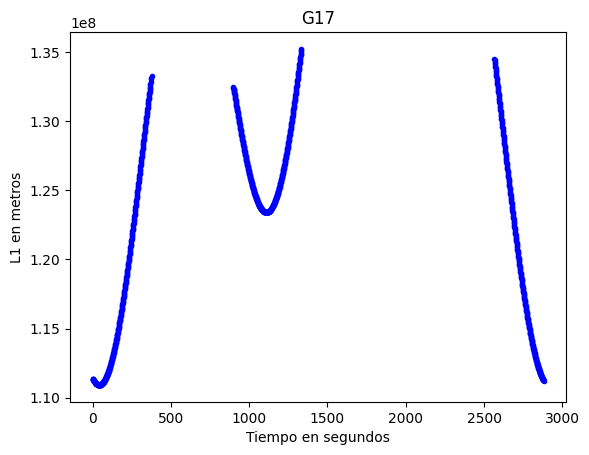

In [34]:
# En primer lugar vamos a obtener todas las gráfica sobre la señal de fase L1
import matplotlib.pyplot as plt 

def graficar_frec(filename : str, frec : int) -> None:#Se puede optimizar bastante aunque no es determinante en este caso
    sats = satelites(filename)
    
    for i in sats:
        datos = unafrecuencia(filename,frec, i)
        frecue = ['C1', 'P2', 'P5', 'L1' , 'L2' , 'L5' ]
        plt.title(i)
        plt.ylabel(f"{frecue[frec]} en metros")
        plt.xlabel("Tiempo en segundos")
        plt.plot([i for i in datos.keys()] , [j for j in datos.values()], '.b')

        plt.show()

def graficar_sat(filename : str , frec : int , sat : str) -> None:
    if frec == 0 :
        datos = C1(filename, sat)

    elif frec == 1 :
        datos = P2(filename, sat)

    elif frec == 3 : 
        datos = L1(filename, sat)

    elif frec == 4:
        datos = L2(filename, sat)
    
    frecue = ['C1', 'P2', 'P5', 'L1' , 'L2' , 'L5' ]

    plt.title(sat)
    plt.ylabel(f"{frecue[frec]} en metros")
    plt.xlabel("Tiempo en segundos")
    plt.plot([i for i in datos.keys()] , [j for j in datos.values()], '.b')
    plt.show()

#Ocupa mucho espacio por tanto no lo mostraremos aquí, pero si lo haremos para un satélite
#graficar_frec(filename, 3) #grafica todas las señales de fase L1 para cada satélite
graficar_sat(filename, 3, 'G17')


#Otra opción para realizar la graficación cuando tenemos los datos es la siguiente:
def graf_datos(datos: dict, titulo: str) -> None:
    plt.title(titulo)
    plt.plot([i for i in datos.keys()] , [j for j in datos.values()], '.b')
    plt.show()

Vamos a utilizar todo lo visto para realizar una combinación libre de geometría para el satélite `G01`

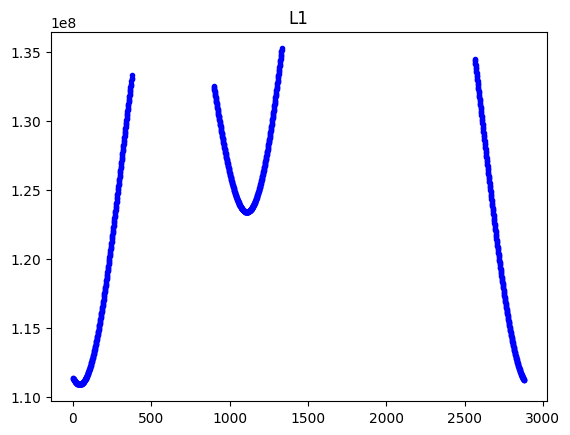

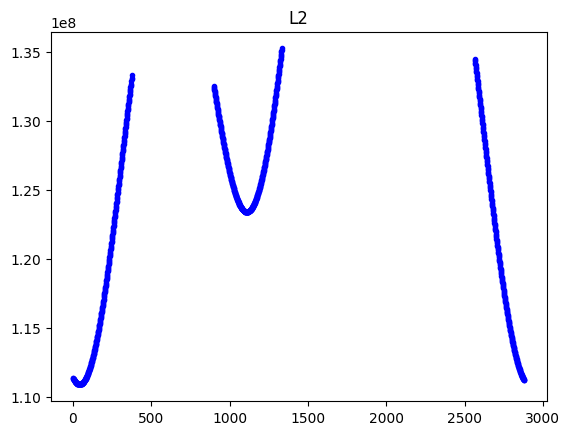

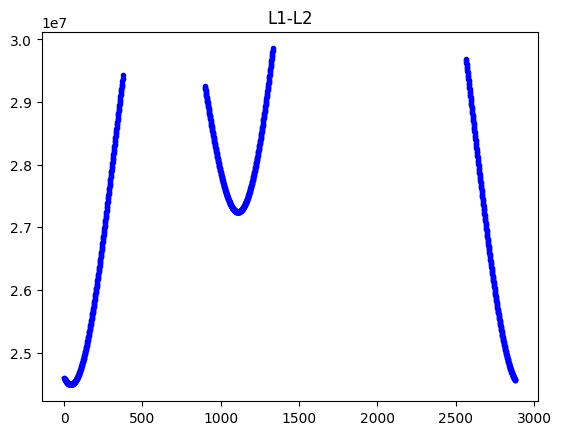

Graficación L1
 None Graficación L2
 None Graficación L1-L2
 None


In [35]:
# Primero obtenemos la información de un archivo RINEX
filename = "ejemplo.txt"
sat = 'G17'
D = all_information2(filename)

#Obtenemos la información del satélite G01 sobre L1 y L2
l1, l2 = L1(filename, sat), L2(filename, sat)
l1menosl2 = f1menosf2(l1,l2)

# Graficación de l1,l2 y l1 - l2
print("Graficación L1\n", graf_datos(l1,"L1"),
      "Graficación L2\n", graf_datos(l1,"L2"),
      "Graficación L1-L2\n", graf_datos(l1menosl2, "L1-L2")  )
